https://ttc.lacounty.gov/county-holidays/ <br>
https://seasonsyear.com/USA/California/Los-Angeles

### Import Packages


In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

### 1.Data Loading and Basic Exploration
•Load the chosen primary crime dataset and display the first five rows.<br>
•Describe the structure of the dataset, including column names, data types, and any unique identifiers.<br>
•Identify and handle any missing values early in the pipeline. Note down your strategy for handling these missing values (e.g., filling, dropping, or imputing values).

In [3]:
# Primary Dataset
df_crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv',low_memory=False)

In [4]:
df_crime.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [5]:
df_crime.shape

(986500, 28)

In [7]:
df_crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
df_crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [9]:
df_crime.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           146435
Vict Age               0
Vict Sex          139575
Vict Descent      139586
Premis Cd             14
Premis Desc          585
Weapon Used Cd    660132
Weapon Desc       660132
Status                 1
Status Desc            0
Crm Cd 1              11
Crm Cd 2          917588
Crm Cd 3          984190
Crm Cd 4          986436
LOCATION               0
Cross Street      834230
LAT                    0
LON                    0
dtype: int64

##### To Calculate Severity in future steps changing the crime codes with Nan to 0

In [11]:
df_crime.fillna(0, inplace=True)
df_crime.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [12]:
df_crime.duplicated().sum()

0

In [13]:
df_crime.loc[df_crime['Crm Cd 1']>0,'Crm Cd 1'] = 1
df_crime.loc[df_crime['Crm Cd 2']>0,'Crm Cd 2'] = 1
df_crime.loc[df_crime['Crm Cd 3']>0,'Crm Cd 3'] = 1
df_crime.loc[df_crime['Crm Cd 4']>0,'Crm Cd 4'] = 1

In [14]:
df_crime.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,1.0,1.0,0.0,0.0,1900 S LONGWOOD AV,0,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,1.0,1.0,0.0,0.0,1000 S FLOWER ST,0,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,1.0,0.0,0.0,0.0,1400 W 37TH ST,0,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,1.0,0.0,0.0,0.0,14000 RIVERSIDE DR,0,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,1.0,0.0,0.0,0.0,1900 TRANSIENT,0,34.0944,-118.3277


### 2.Data Cleaning and Transformation
•Standardize Column Names: Convert all column names to lowercase and replace any spaces with underscores.<br>
•Extract Date and Time Components: If your dataset has a timestamp column, extract the year, month, day, and hour into new columns.<br>
•Add Derived Columns: Based on your analysis, create relevant columns (e.g., is_weekend for weekend analysis or crime_severity if there's data on severity levels).

In [16]:
df_crime.columns = df_crime.columns.str.replace(r'\s','_',regex = True).str.lower()

In [17]:
df_crime.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1-2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat',
       'lon'],
      dtype='object')

In [18]:
df_crime['day_of_week'] = pd.to_datetime(df_crime['date_occ'], format='%m/%d/%Y %I:%M:%S %p').dt.day_name()
df_crime['month'] = pd.to_datetime(df_crime['date_occ'], format='%m/%d/%Y %I:%M:%S %p').dt.month_name()
df_crime['year'] = pd.to_datetime(df_crime['date_occ'], format='%m/%d/%Y %I:%M:%S %p').dt.year
df_crime.head()


,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,day_of_week,month,year
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1.0,0.0,0.0,1900 S LONGWOOD AV,0,34.0375,-118.3506,Sunday,March,2020
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1.0,0.0,0.0,1000 S FLOWER ST,0,34.0444,-118.2628,Saturday,February,2020
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,0.0,0.0,0.0,1400 W 37TH ST,0,34.0210,-118.3002,Wednesday,November,2020
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,0.0,0.0,0.0,14000 RIVERSIDE DR,0,34.1576,-118.4387,Tuesday,March,2020
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,0.0,0.0,0.0,1900 TRANSIENT,0,34.0944,-118.3277,Monday,August,2020


In [19]:
df_crime['date'] = pd.to_datetime(df_crime['date_occ'], format='%m/%d/%Y %I:%M:%S %p').dt.date

In [20]:
df_crime['weekend'] = df_crime['day_of_week'].apply(lambda day: 1 if day in ['Saturday', 'Sunday'] else 0)
df_crime.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,crm_cd_4,location,cross_street,lat,lon,day_of_week,month,year,date,weekend
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,0.0,1900 S LONGWOOD AV,0,34.0375,-118.3506,Sunday,March,2020,2020-03-01,1
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,0.0,1000 S FLOWER ST,0,34.0444,-118.2628,Saturday,February,2020,2020-02-08,1
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,0.0,1400 W 37TH ST,0,34.0210,-118.3002,Wednesday,November,2020,2020-11-04,0
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,0.0,14000 RIVERSIDE DR,0,34.1576,-118.4387,Tuesday,March,2020,2020-03-10,0
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,0.0,1900 TRANSIENT,0,34.0944,-118.3277,Monday,August,2020,2020-08-17,0


In [21]:
df_crime['season'] = df_crime['month'].apply(
    lambda month: 'spring' if month in ['March', 'April', 'May'] else
                  'summer' if month in ['June', 'July', 'August'] else
                  'autumn' if month in ['September', 'October', 'November'] else
                  'winter')

In [22]:
df_crime

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,location,cross_street,lat,lon,day_of_week,month,year,date,weekend,season
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,1900 S LONGWOOD AV,0,34.0375,-118.3506,Sunday,March,2020,2020-03-01,1,spring
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,1000 S FLOWER ST,0,34.0444,-118.2628,Saturday,February,2020,2020-02-08,1,winter
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,1400 W 37TH ST,0,34.0210,-118.3002,Wednesday,November,2020,2020-11-04,0,autumn
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,14000 RIVERSIDE DR,0,34.1576,-118.4387,Tuesday,March,2020,2020-03-10,0,spring
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,1900 TRANSIENT,0,34.0944,-118.3277,Monday,August,2020,2020-08-17,0,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986495,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,3700 WILSHIRE BL,0,34.0617,-118.3066,Saturday,August,2024,2024-08-17,1,summer
986496,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,4000 W 23RD ST,0,34.0362,-118.3284,Tuesday,July,2024,2024-07-23,0,summer
986497,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,1300 W SUNSET BL,0,34.0685,-118.2460,Monday,January,2024,2024-01-15,0,winter
986498,240309674,04/24/2024 12:00:00 AM,04/24/2024 12:00:00 AM,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,FLOWER ST,JEFFERSON BL,34.0215,-118.2868,Wednesday,April,2024,2024-04-24,0,spring


### 3.Data Enrichment with External Data
•Choose one of the external datasets above (e.g., weather, demographics) and merge it with your primary dataset based on location or time to add new context to your analysis.<br>
•Document the transformation steps and show the first five rows of the enriched dataset.

### LAPD MAP

In [31]:
lapd_map = gpd.read_file('LAPD_Map/LAPD_Divisions.shp')

In [32]:
lapd_map

,APREC,PREC,AREA,PERIMETER,geometry
0,MISSION,19,6.995826e+08,190817.495739,"POLYGON ((6408504.431 1944548.806, 6408709.000..."
1,DEVONSHIRE,17,1.346816e+09,175591.702871,"POLYGON ((6408504.431 1944548.806, 6408488.500..."
2,FOOTHILL,16,1.297385e+09,203717.879169,"POLYGON ((6436082.000 1929575.125, 6435220.500..."
3,TOPANGA,21,9.090326e+08,155505.795458,"POLYGON ((6370761.344 1909803.646, 6371272.500..."
4,WEST VALLEY,10,9.364057e+08,136316.899694,"POLYGON ((6391688.000 1903046.000, 6391685.500..."
5,NORTH HOLLYWOOD,15,6.346011e+08,187366.252732,"POLYGON ((6457961.500 1864933.875, 6457941.000..."
6,VAN NUYS,9,4.896950e+08,116288.308461,"POLYGON ((6418600.165 1901509.458, 6418593.886..."
7,NORTHEAST,11,8.156022e+08,178460.722082,"POLYGON ((6462116.637 1877212.646, 6462190.767..."
8,HOLLYWOOD,6,3.718353e+08,115808.747099,"POLYGON ((6456659.500 1865616.750, 6456649.000..."
9,WEST LOS ANGELES,8,1.803659e+09,295206.415546,"POLYGON ((6404838.438 1831903.047, 6404827.906..."


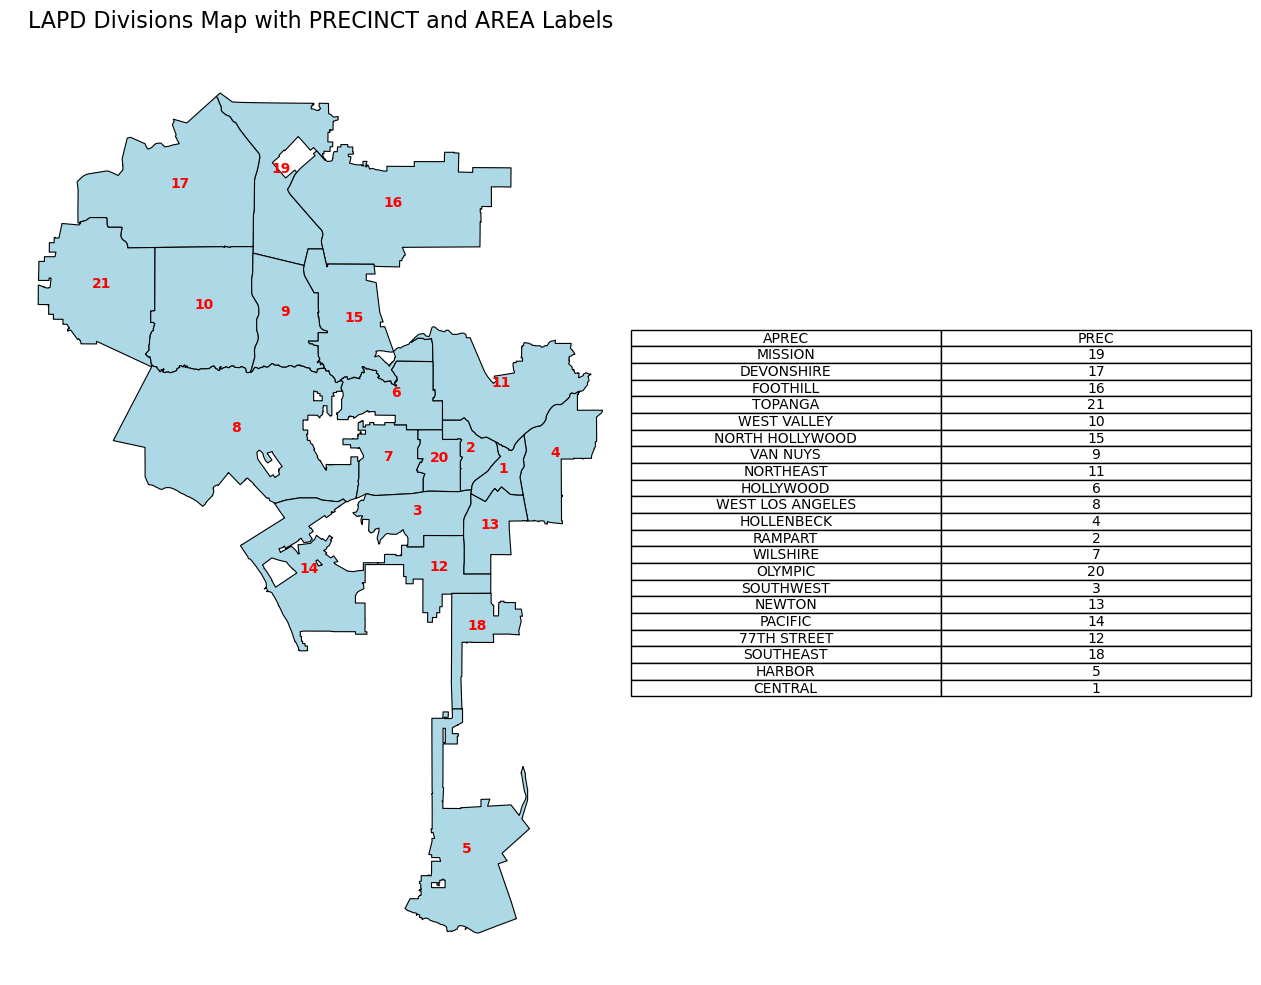

In [34]:

fig, ax = plt.subplots(figsize=(12, 12))
lapd_map.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.8)


for x, y, label in zip(lapd_map.geometry.centroid.x, lapd_map.geometry.centroid.y, lapd_map['PREC']):
    ax.text(x, y, label, fontsize=10, ha='center', color='red', fontweight='bold')


table_data = lapd_map[['APREC', 'PREC']]


table = plt.table(cellText=table_data.values, colLabels=table_data.columns, 
                  cellLoc='center', colLoc='center', loc='right', fontsize=10)


ax.set_title('LAPD Divisions Map with PRECINCT and AREA Labels', fontsize=16)
ax.set_axis_off()


plt.show()


In [86]:
df_crime_sampled = df_crime.loc[df_crime['year'].between(2021, 2023)]
df_crime_sampled.reset_index(drop=True, inplace=True)
df_crime_sampled.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,location,cross_street,lat,lon,day_of_week,month,year,date,weekend,season
0,221909322,05/10/2022 12:00:00 AM,10/01/2021 12:00:00 AM,1,19,Mission,1985,1,510,VEHICLE - STOLEN,...,8700 VAN NUYS BL,0,34.2276,-118.4500,Friday,October,2021,2021-10-01,0,autumn
1,210507493,04/01/2021 12:00:00 AM,03/01/2021 12:00:00 AM,1200,5,Harbor,555,1,510,VEHICLE - STOLEN,...,900 N GRAND AV,0,33.7508,-118.2901,Monday,March,2021,2021-03-01,0,spring
2,210210138,06/01/2021 12:00:00 AM,05/31/2021 12:00:00 AM,2100,2,Rampart,221,1,510,VEHICLE - STOLEN,...,4200 ROSEWOOD AV,0,34.0790,-118.2970,Monday,May,2021,2021-05-31,0,spring
3,211005234,02/10/2021 12:00:00 AM,02/09/2021 12:00:00 AM,2200,10,West Valley,1025,2,354,THEFT OF IDENTITY,...,CHIMINEAS,VANOWEN,34.1939,-118.5284,Tuesday,February,2021,2021-02-09,0,winter
4,211410912,05/05/2021 12:00:00 AM,05/05/2021 12:00:00 AM,30,14,Pacific,1414,1,510,VEHICLE - STOLEN,...,600 FLOWER AV,0,33.9984,-118.4713,Wednesday,May,2021,2021-05-05,0,spring


In [36]:
df_911_calls_2021 = pd.read_csv('911_Calls/LAPD_Calls_for_Service_2021.csv')
df_911_calls_2022 = pd.read_csv('911_Calls/LAPD_Calls_for_Service_2022.csv')
df_911_calls_2023 = pd.read_csv('911_Calls/LAPD_Calls_for_Service_2023.csv')

In [42]:
df_911_calls = pd.concat([df_911_calls_2021, df_911_calls_2022,df_911_calls_2023])

In [54]:
df_911_calls.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,PD21061400005156,Outside,NaN,06/14/2021 12:00:00 AM,23:28:27,902,TRAFFIC STOP
1,PD21061100000067,Northeast,1116.0,06/11/2021 12:00:00 AM,00:22:10,507P,PARTY
2,PD21061400005022,Outside,NaN,06/14/2021 12:00:00 AM,22:53:07,006,CODE 6
3,PD21061200000206,Outside,NaN,06/12/2021 12:00:00 AM,00:41:01,006,CODE 6
4,PD21061300004840,Hollenbeck,427.0,06/13/2021 12:00:00 AM,22:12:19,594H,CZN HLDG


In [56]:
df_911_calls['Area_Occ'].unique()

array(['Outside', 'Northeast', 'Hollenbeck', '77th Street', 'N Hollywood',
       'Harbor', 'Southwest', 'Devonshire', 'Rampart', 'West LA',
       'Mission', 'Newton', 'Hollywood', 'Foothill', 'West Valley',
       'Pacific', 'Wilshire', 'Southeast', 'Topanga', 'Olympic',
       'Van Nuys', 'Central'], dtype=object)

In [58]:
df_911_calls.columns = df_911_calls.columns.str.replace(r'/s','_',regex = True).str.lower()

In [60]:
df_911_calls.isna().sum()

incident_number          0
area_occ                 0
rpt_dist           1596287
dispatch_date            0
dispatch_time            0
call_type_code           0
call_type_text           0
dtype: int64

In [90]:
df_911_calls = df_911_calls.drop(['rpt_dist'],axis = 1)

In [92]:
areas = [
    'Outside', 'Northeast', 'Hollenbeck', '77th Street', 'N Hollywood', 'Harbor', 
    'Southwest', 'Devonshire', 'Rampart', 'West LA', 'Mission', 'Newton', 
    'Hollywood', 'Foothill', 'West Valley', 'Pacific', 'Wilshire', 'Southeast', 
    'Topanga', 'Olympic', 'Van Nuys', 'Central'
]

# Corresponding updated area codes, including 'Outside' as 22
codes = [22, 11, 4, 12, 15, 5, 3, 17, 2, 8, 19, 13, 6, 16, 10, 14, 7, 18, 21, 20, 9, 1]

# Create a dictionary with the updated names and codes
area_codes_dict = dict(zip(areas, codes))


# Map 'area_occ' to the new 'area' column using the dictionary
df_911_calls['area'] = df_911_calls['area_occ'].map(area_code_dict)

df_911_calls.head(10)

,incident_number,area_occ,dispatch_date,dispatch_time,call_type_code,call_type_text,area
0,PD21061400005156,Outside,06/14/2021 12:00:00 AM,23:28:27,902,TRAFFIC STOP,22
1,PD21061100000067,Northeast,06/11/2021 12:00:00 AM,00:22:10,507P,PARTY,11
2,PD21061400005022,Outside,06/14/2021 12:00:00 AM,22:53:07,006,CODE 6,22
3,PD21061200000206,Outside,06/12/2021 12:00:00 AM,00:41:01,006,CODE 6,22
4,PD21061300004840,Hollenbeck,06/13/2021 12:00:00 AM,22:12:19,594H,CZN HLDG,4
5,PD21061200003555,77th Street,06/12/2021 12:00:00 AM,18:39:20,620FR,FAMILY R/O,12
6,PD21061200005040,Outside,06/12/2021 12:00:00 AM,22:43:08,006,CODE 6,22
7,PD21061400000703,Outside,06/14/2021 12:00:00 AM,05:03:01,006,CODE 6,22
8,PD21061400000478,77th Street,06/14/2021 12:00:00 AM,02:51:54,503T3J,ATT GTA J/O,12
9,PD21061400002440,N Hollywood,06/14/2021 12:00:00 AM,13:06:50,907A3,AMB ATT SUICIDE,15


In [94]:
df_911_calls['day_of_week'] = pd.to_datetime(df_911_calls['dispatch_date'], format='%m/%d/%Y %I:%M:%S %p').dt.day_name()
df_911_calls['month']= pd.to_datetime(df_911_calls['dispatch_date'],format = '%m/%d/%Y %I:%M:%S %p').dt.month_name()
df_911_calls['year']= pd.to_datetime(df_911_calls['dispatch_date'],format = '%m/%d/%Y %I:%M:%S %p').dt.year
df_911_calls['date'] = pd.to_datetime(df_911_calls['dispatch_date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

In [95]:
df_911_calls['weekend'] = df_911_calls['day_of_week'].apply(lambda day: 1 if day in ['Saturday', 'Sunday'] else 0)
df_911_calls['season'] = df_911_calls['month'].apply(
    lambda month: 'spring' if month in ['March', 'April', 'May'] else
                  'summer' if month in ['June', 'July', 'August'] else
                  'autumn' if month in ['September', 'October', 'November'] else
                  'winter')


In [97]:
df_911_calls.head()

,incident_number,area_occ,dispatch_date,dispatch_time,call_type_code,call_type_text,area,day_of_week,month,year,date,weekend,season
0,PD21061400005156,Outside,06/14/2021 12:00:00 AM,23:28:27,902,TRAFFIC STOP,22,Monday,June,2021,2021-06-14,0,summer
1,PD21061100000067,Northeast,06/11/2021 12:00:00 AM,00:22:10,507P,PARTY,11,Friday,June,2021,2021-06-11,0,summer
2,PD21061400005022,Outside,06/14/2021 12:00:00 AM,22:53:07,006,CODE 6,22,Monday,June,2021,2021-06-14,0,summer
3,PD21061200000206,Outside,06/12/2021 12:00:00 AM,00:41:01,006,CODE 6,22,Saturday,June,2021,2021-06-12,1,summer
4,PD21061300004840,Hollenbeck,06/13/2021 12:00:00 AM,22:12:19,594H,CZN HLDG,4,Sunday,June,2021,2021-06-13,1,summer


In [114]:
df_911_calls_filtered = df_911_calls[df_911_calls['area'] != 22]

In [116]:

crime_counts = df_crime_sampled[['date', 'area']].value_counts().reset_index()
crime_counts.columns = ['date', 'area', 'crime_count']

calls_counts = df_911_calls_filtered[['date', 'area']].value_counts().reset_index()
calls_counts.columns = ['date', 'area', '911_calls_count']


df_combined = pd.merge(crime_counts, calls_counts, on=['date', 'area'])


df_combined.head()


,date,area,crime_count,911_calls_count
0,2023-08-06,3,114,191
1,2023-02-02,12,111,155
2,2022-12-01,12,111,137
3,2022-10-01,12,105,183
4,2022-10-02,12,104,181


In [118]:
df_combined.head()

,date,area,crime_count,911_calls_count
0,2023-08-06,3,114,191
1,2023-02-02,12,111,155
2,2022-12-01,12,111,137
3,2022-10-01,12,105,183
4,2022-10-02,12,104,181


In [122]:
df_combined['day_of_week'] = pd.to_datetime(df_combined['date'], format='%Y/%m/%d').dt.day_name()
df_combined['month']= pd.to_datetime(df_combined['date'],format='%Y/%m/%d').dt.month_name()
df_combined['year']= pd.to_datetime(df_combined['date'],format='%Y/%m/%d').dt.year

In [124]:
df_combined.head()

,date,area,crime_count,911_calls_count,day_of_week,month,year
0,2023-08-06,3,114,191,Sunday,August,2023
1,2023-02-02,12,111,155,Thursday,February,2023
2,2022-12-01,12,111,137,Thursday,December,2022
3,2022-10-01,12,105,183,Saturday,October,2022
4,2022-10-02,12,104,181,Sunday,October,2022


In [126]:
df_combined['weekend'] = df_combined['day_of_week'].apply(lambda day: 1 if day in ['Saturday', 'Sunday'] else 0)
df_combined['season'] = df_combined['month'].apply(
    lambda month: 'spring' if month in ['March', 'April', 'May'] else
                  'summer' if month in ['June', 'July', 'August'] else
                  'autumn' if month in ['September', 'October', 'November'] else
                  'winter')

In [128]:
df_combined.head()

,date,area,crime_count,911_calls_count,day_of_week,month,year,weekend,season
0,2023-08-06,3,114,191,Sunday,August,2023,1,summer
1,2023-02-02,12,111,155,Thursday,February,2023,0,winter
2,2022-12-01,12,111,137,Thursday,December,2022,0,winter
3,2022-10-01,12,105,183,Saturday,October,2022,1,autumn
4,2022-10-02,12,104,181,Sunday,October,2022,1,autumn
